/var/folders/xl/r4___wpd4psfv7ckxk9gm2m00000gn/T/ipykernel_49879/874949797.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_fft = torch.fft.fft2(torch.tensor(X, dtype=torch.complex64), dim=(-2, -1))


Using device: mps
X_train: torch.Size([5740, 2, 128, 128]) y_train: torch.Size([5740])


100%|██████████| 97/97 [00:01<00:00, 63.29it/s]


Epoch 1, Validation Loss: 0.9401726237277395, Validation Accuracy: 56.41447368421052% 



100%|██████████| 97/97 [00:01<00:00, 76.92it/s]


Epoch 2, Validation Loss: 0.8647807160603631, Validation Accuracy: 60.411014650027134% 



100%|██████████| 97/97 [00:01<00:00, 76.51it/s]


Epoch 3, Validation Loss: 0.7696754883245095, Validation Accuracy: 64.66359196961476% 



100%|██████████| 97/97 [00:01<00:00, 76.16it/s]


Epoch 4, Validation Loss: 0.6556672844075665, Validation Accuracy: 71.90382528486164% 



100%|██████████| 180/180 [00:06<00:00, 25.96it/s]
/Users/Pascal/opt/anaconda3/envs/mit6300/lib/python3.12/site-packages/umap/umap_.py:1880: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(


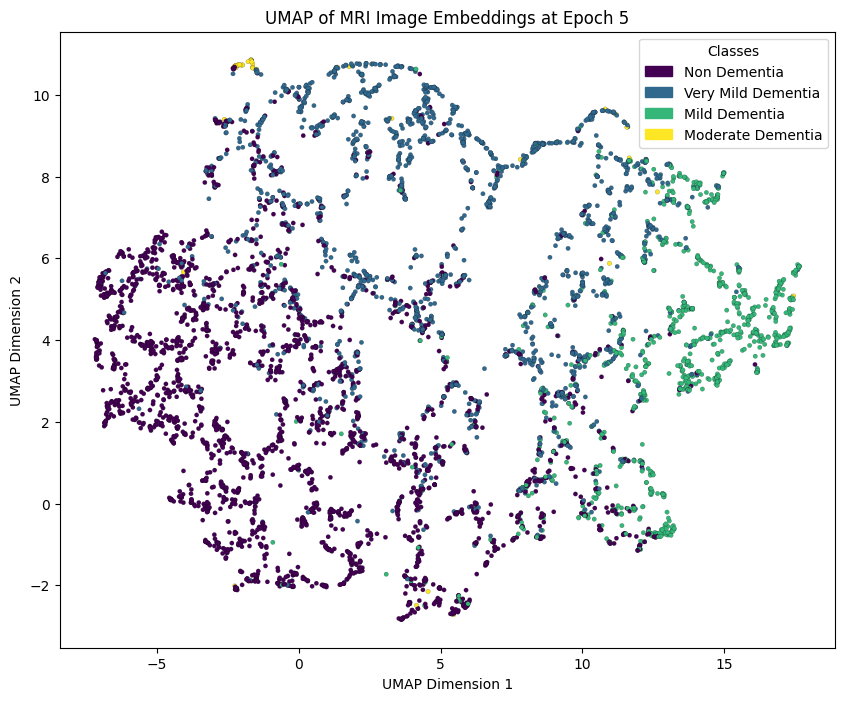

100%|██████████| 97/97 [00:02<00:00, 48.39it/s]


Epoch 5, Validation Loss: 0.591103517517601, Validation Accuracy: 74.20137004883343% 



100%|██████████| 97/97 [00:01<00:00, 57.69it/s]


Epoch 6, Validation Loss: 0.32201632043135536, Validation Accuracy: 87.2948317959848% 



100%|██████████| 97/97 [00:01<00:00, 73.67it/s]


Epoch 7, Validation Loss: 0.21527544597221404, Validation Accuracy: 92.89032826912643% 



100%|██████████| 97/97 [00:01<00:00, 62.63it/s]


Epoch 8, Validation Loss: 0.14716085501629667, Validation Accuracy: 95.36082474226804% 



100%|██████████| 97/97 [00:01<00:00, 68.73it/s]


Epoch 9, Validation Loss: 0.15228661110375039, Validation Accuracy: 95.68298969072166% 



100%|██████████| 180/180 [00:07<00:00, 24.05it/s]
/Users/Pascal/opt/anaconda3/envs/mit6300/lib/python3.12/site-packages/umap/umap_.py:1880: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(


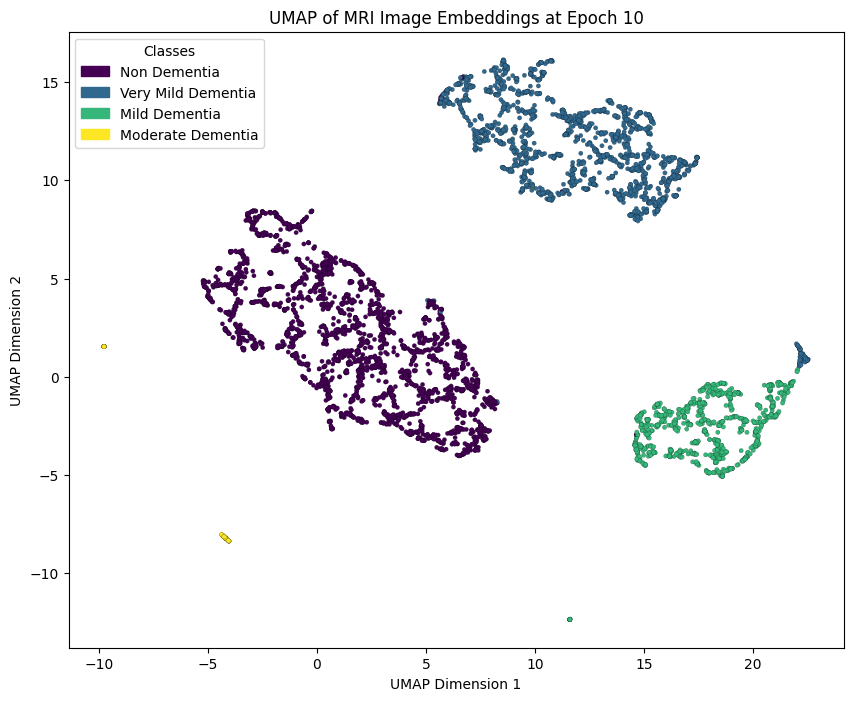

100%|██████████| 97/97 [00:01<00:00, 68.70it/s]


Epoch 10, Validation Loss: 0.16066033546764827, Validation Accuracy: 94.68427835051547% 



100%|██████████| 97/97 [00:01<00:00, 73.16it/s]


Epoch 11, Validation Loss: 0.12892252262489698, Validation Accuracy: 96.23067010309278% 



100%|██████████| 97/97 [00:01<00:00, 70.95it/s]


Epoch 12, Validation Loss: 0.09101224492649673, Validation Accuracy: 97.84149484536083% 



100%|██████████| 97/97 [00:01<00:00, 61.30it/s]


Epoch 13, Validation Loss: 0.0959218420801185, Validation Accuracy: 97.90592783505154% 



100%|██████████| 97/97 [00:01<00:00, 70.38it/s]


Epoch 14, Validation Loss: 0.1725792424926131, Validation Accuracy: 94.71649484536083% 



100%|██████████| 180/180 [00:07<00:00, 23.48it/s]
/Users/Pascal/opt/anaconda3/envs/mit6300/lib/python3.12/site-packages/umap/umap_.py:1880: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(


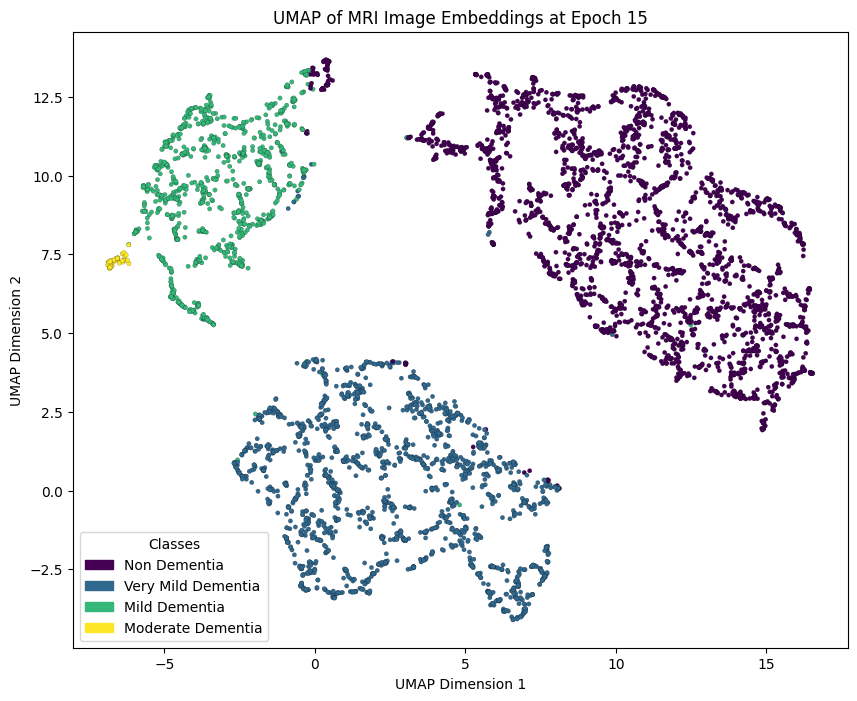

100%|██████████| 97/97 [00:01<00:00, 50.74it/s]


Epoch 15, Validation Loss: 0.10231482793490604, Validation Accuracy: 97.36842105263158% 

8831 (8831, 4) (4,) 8831


/Users/Pascal/opt/anaconda3/envs/mit6300/lib/python3.12/site-packages/umap/umap_.py:1880: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(


(8831, 2)


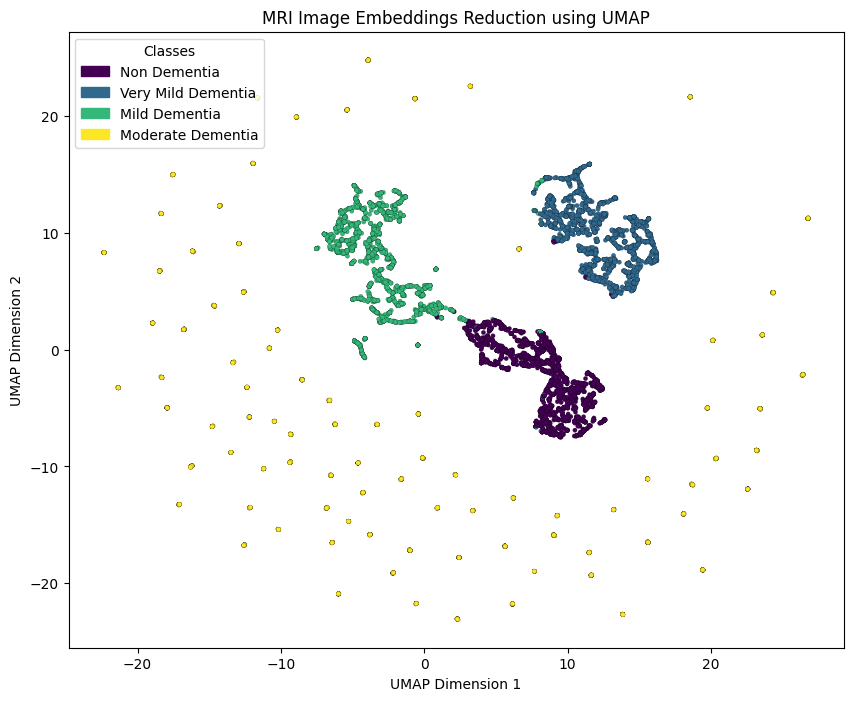

In [12]:
import cv2
import os
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
import numpy as np
from transformers import pipeline
from huggingface_hub import hf_hub_url, cached_download
from torch.nn import MultiheadAttention
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import umap
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split

REPO_NAME = 'ppxscal/cv_project'
X_FILE = 'X_tensor.pt'
Y_FILE = 'y_tensor.pt'

# Get the URL for each file
x_url = hf_hub_url(REPO_NAME, X_FILE)
y_url = hf_hub_url(REPO_NAME, Y_FILE)

# Download the files and cache them locally
x_cache = cached_download(x_url)
y_cache = cached_download(y_url)

# Load the tensors from the cached files
X = torch.load(x_cache)
y = torch.load(y_cache)

import torch
import torch.fft

# Assuming X is loaded and has shape [8831, 128, 128]

# Compute the Fourier transform
X_fft = torch.fft.fft2(torch.tensor(X, dtype=torch.complex64), dim=(-2, -1))

# Shift the zero-frequency component to the center
X_fft_shifted = torch.fft.fftshift(X_fft, dim=(-2, -1))

# Take the magnitude (you could also take the phase or real/imaginary parts depending on your need)
X_fft_mag = X_fft_shifted.abs()

# Normalize the magnitude for better visualization and learning stability
X_fft_mag = (X_fft_mag - X_fft_mag.min()) / (X_fft_mag.max() - X_fft_mag.min())

# Add a channel dimension to original and FFT images
X_original = X.unsqueeze(1)  # Shape becomes [8831, 1, 128, 128]
X_fft_mag = X_fft_mag.unsqueeze(1)  # Shape becomes [8831, 1, 128, 128]

# Concatenate along the channel dimension
X_combined = torch.cat((X_original, X_fft_mag), dim=1)  # Shape becomes [8831, 2, 128, 128]

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # Adjust the first convolutional layer to accept 2 channels
        # Adding dilation to the first convolutional layer
        self.conv1 = nn.Conv2d(2, 16, kernel_size=3, padding=2, dilation=2)
        # Adding dilation to the second convolutional layer
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=2, dilation=2)
        # Adding dilation to the third convolutional layer
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=2, dilation=2)
        self.pool = nn.MaxPool2d(2, 2)
        # Adjust the size of the flattened layer accordingly if the input size changes
        # Assuming the input size is 128x128, and after three pooling layers, the size is reduced by a factor of 8
        # The output size after pooling layers would still be 16x16 due to adjusted padding for dilation
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, 4)  # Assuming 4 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 16 * 16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Device configuration, optimizer, loss function, and training loop remain the same.
    
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")  

print(f'Using device: {device}')

model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

num_epochs = 15  # You can adjust this based on your specific needs

from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_combined, y, test_size=0.35, random_state=42)

# Create DataLoaders for both training and validation sets
print('X_train:', X_train.shape, 'y_train:', y_train.shape)
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

labels_to_class = {
0: "Non Dementia",
1: "Very Mild Dementia",
2: "Mild Dementia",
3: "Moderate Dementia",
}

import numpy as np
import umap
import matplotlib.pyplot as plt

def plot_umap(embeddings, labels, epoch, labels_to_class):
    reducer = umap.UMAP(n_neighbors=10, min_dist=0.15, n_components=2, metric='hamming')
    umap_embeddings = reducer.fit_transform(embeddings)

    cmap = plt.get_cmap('viridis')
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=labels, cmap=cmap, s=10, edgecolor='black', linewidth=0.1)
    legend_handles = [mpatches.Patch(color=cmap(i / (len(labels_to_class) - 1)), label=labels_to_class[i]) for i in labels_to_class]
    plt.legend(handles=legend_handles, title="Classes")
    plt.title(f'UMAP of MRI Image Embeddings at Epoch {epoch}')
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.show()


def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs.data, 1)
    total = labels.size(0)
    correct = (predicted == labels).sum().item()
    return 100 * correct / total

for epoch in range(num_epochs):
    model.train()
    embeddings = []
    labels_list = []
    
    for images, labels in tqdm(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (epoch + 1) % 5 == 0:  # Collect data for UMAP every 5 epochs
            with torch.no_grad():
                emb = model(images)
                embeddings.append(emb.cpu().numpy())
                labels_list.append(labels.cpu().numpy())

    if (epoch + 1) % 5 == 0:  # Plot UMAP every 5 epochs
        embeddings = np.concatenate(embeddings, axis=0)
        labels_list = np.concatenate(labels_list, axis=0)
        plot_umap(embeddings, labels_list, epoch + 1, labels_to_class)

    # Continue with validation and other training logistics...
    
    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    val_accuracy = 0.0
    with torch.no_grad():  # No gradient updates during validation
        for images, labels in tqdm(val_loader):  # Use val_loader for validation
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            val_accuracy += calculate_accuracy(outputs, labels)
    
    avg_val_loss = val_running_loss / len(val_loader)
    avg_val_accuracy = val_accuracy / len(val_loader)
    print(f'Epoch {epoch + 1}, Validation Loss: {avg_val_loss}, Validation Accuracy: {avg_val_accuracy}% \n')

model.eval()    
embeddings = []
labels_list = []

class_counts = y.bincount()
num_samples = y.size(0)
class_weights = 1. / class_counts

# Create a list of weights for each sample
sample_weights = class_weights[y]

# Set up the sampler
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=num_samples, replacement=True)

# Create a dataset and a dataloader
dataset = TensorDataset(X_combined, y)
dataloader = DataLoader(dataset, batch_size=32, sampler=sampler)
# dataloader = DataLoader(dataset, batch_size=32)
# dataloader = train_loader
with torch.no_grad():
    for images, labels in dataloader:
        images = images.to(device)
        emb = model(images)
        # print(F.softmax(emb, dim=0))
        embeddings.append(emb.cpu().numpy())
        labels_list.append(labels.cpu().numpy())

# Concatenate all embeddings and labels
embeddings = np.concatenate(embeddings, axis=0)
labels_list = np.concatenate(labels_list, axis=0)

import numpy as np
import umap
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib.cm import plasma  # Import plasma colormap


print(len(embeddings), embeddings.shape, embeddings[0].shape, len(labels_list))

# Perform UMAP reduction
reducer = umap.UMAP(n_neighbors=10, min_dist=0.15, n_components=2, metric='hamming')
umap_embeddings = reducer.fit_transform(embeddings)
print(umap_embeddings.shape)
# umap_embeddings = umap_embeddings / np.linalg.norm(umap_embeddings, axis=1)
cmap = plt.cm.viridis

plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=labels_list, cmap=cmap, s=10, edgecolor='black', linewidth=0.1)
# Create a legend
legend_handles = [mpatches.Patch(color=cmap(i / (len(labels_to_class) - 1)), label=labels_to_class[i]) for i in labels_to_class]
plt.legend(handles=legend_handles, title="Classes")

plt.title('MRI Image Embeddings Reduction using UMAP')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()